In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Data Understanding
Exploring structure, types, and basic statistics.

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Cleaning
check for nulls and duplicates 

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Exploratory Analysis

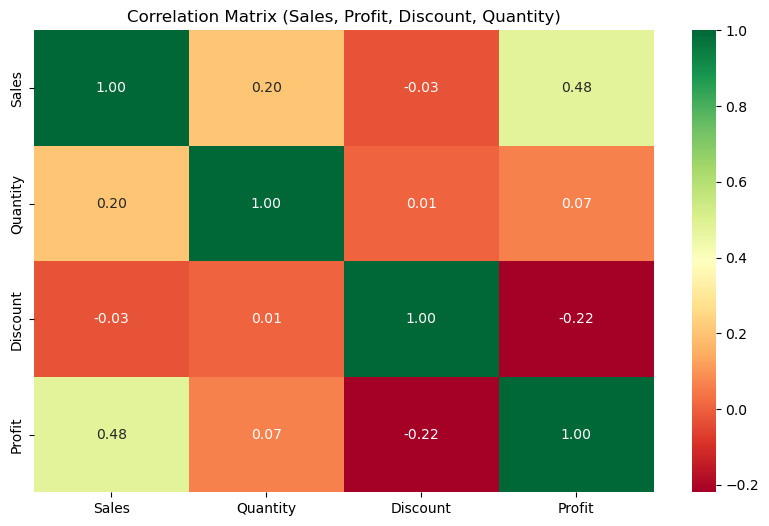

In [5]:
numerical_cols=['Sales','Quantity','Discount','Profit']
corr_matrix=df[numerical_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlation Matrix (Sales, Profit, Discount, Quantity)')
plt.show()

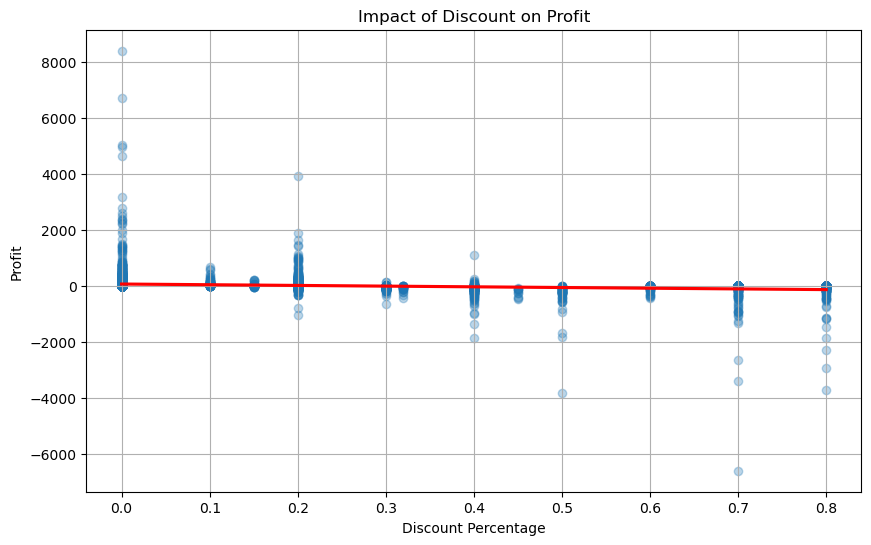

In [6]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Discount', y='Profit', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount Percentage')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

## Is the profit concentrated in specific cities? (Applying the 80/20 Rule)

### In this section, I will identify which cities generate the bulk of the company's profit using the cumulative distribution.

In [12]:
# cum_per= (cumsum(profit)/sum(profit))*100
city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).reset_index()
city_profit['Cumulative_Profit_Percentage'] = 100 * (city_profit['Profit'].cumsum() / city_profit['Profit'].sum())
city_profit.head(10)

,City,Profit,Cumulative_Profit_Percentage
0,New York City,62036.9837,21.661183
1,Los Angeles,30440.7579,32.290050
2,Seattle,29156.0967,42.470357
3,San Francisco,17507.3854,48.583335
4,Detroit,13181.7908,53.185963
5,Lafayette,10018.3876,56.684040
6,Jackson,7581.6828,59.331303
7,Atlanta,6993.6629,61.773250
8,Minneapolis,6824.5846,64.156160
9,San Diego,6377.1960,66.382858


## How does the product mix vary across different regions?

### Here, I calculate the probability of a category being sold within a specific region to understand regional preferences.

In [13]:
region_behavior = pd.crosstab(df['Region'], df['Category'], normalize='index') * 100
print(region_behavior)

Category  Furniture  Office Supplies  Technology
Region                                          
Central   20.705984        61.213947   18.080069
East      21.102528        60.112360   18.785112
South     20.493827        61.419753   18.086420
West      22.073057        59.225726   18.701218


## Calculating the Coefficient of Variation (CV) to measure financial risk per region

In [14]:
region_stats = df.groupby('Region')['Profit'].agg(['mean', 'std'])
# to calculat CV we use (std/mean)
region_stats['CV'] = region_stats['std'] / region_stats['mean']
print(region_stats.sort_values(by='CV'))

              mean         std         CV
Region                                   
West     33.849032  174.109081   5.143695
South    28.857673  212.893088   7.377348
East     32.135808  251.605084   7.829431
Central  17.092709  291.487465  17.053322


## Identifying "Loss-Makers" - Which products are hurting our bottom line

### Not all sales are good sales. In this section, I will identify the top 5 sub-categories that are generating the most significant losses.

In [15]:
sub_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()
loss_makers = sub_profit.sort_values(by='Profit', ascending=True).head(5)
print("Top 5 Loss-Making Sub-Categories:")
print(loss_makers)

Top 5 Loss-Making Sub-Categories:
   Sub-Category      Profit
16       Tables -17725.4811
4     Bookcases  -3472.5560
15     Supplies  -1189.0995
8     Fasteners    949.5182
11     Machines   3384.7569


### Conclusion
The analysis shows that Technology is the main revenue driver, while profitability varies across categories and regions. High sales do not always guarantee high profit, which highlights the importance of optimizing pricing and discount strategies.

### Recommendations
-Invest more in high-revenue categories.

-Optimize pricing to improve profitability.

In [12]:
df.to_excel("cleaned_data.xlsx", index=False)

In [13]:
import os
os.getcwd()

'C:\\Users\\COMPUTER1\\Desktop'